Котляров Николай, 308 группа

Task 1:

In [7]:
import numpy as np
arr = np.random.random((10,3))
print(arr)

[[0.62732359 0.02541751 0.04560706]
 [0.92243427 0.3807781  0.83628087]
 [0.64420222 0.52857024 0.91697467]
 [0.99589545 0.04192988 0.57701138]
 [0.8198521  0.74172743 0.38057711]
 [0.174842   0.08498634 0.05301595]
 [0.71384194 0.34971887 0.11297314]
 [0.00257022 0.34576879 0.55940855]
 [0.9287829  0.41755994 0.77102611]
 [0.44407958 0.99621188 0.28684764]]


In [16]:
print(arr[np.arange(10),np.argmin(abs(arr - 0.5), axis = 1)])

[0.536903   0.59997768 0.4037809  0.30745523 0.68106493 0.40758581
 0.41129102 0.45367896 0.56062338 0.23714969]


Task 2:

In [18]:
arr = np.random.random((6,6))
print(arr)

[[0.40803609 0.82966263 0.26018859 0.94623245 0.08580301 0.24139272]
 [0.57921466 0.23477349 0.17973266 0.99341686 0.85624642 0.82976086]
 [0.76433957 0.24611617 0.54700876 0.04315687 0.83060225 0.03752426]
 [0.80061557 0.45837651 0.07783158 0.40114142 0.28258938 0.49250927]
 [0.59880006 0.9437002  0.99553259 0.05985277 0.63343958 0.6397259 ]
 [0.93554819 0.52282712 0.12554297 0.88807451 0.19219636 0.16635687]]


In [21]:
print(np.sum(arr,axis = 1)/np.min(arr,axis=0))

[ 6.79183909 15.64548446 31.71910334 58.23090194 45.11556056 75.43242721]


Task 3:

In [23]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

mask = x == 0
print(np.max(x[1:][mask[:-1]]))

5


Task 4:

In [24]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

print(x + np.bincount(i, None, len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Task 5:

In [22]:
def New_kmeans(obs, k, iter = 20, thresh = 1e-05) :
    vec = New_whiten(obs)
    (M, N) = vec.shape
    codebook = vec[0:k]    
    distortion1 = 0
    distortion2 = 0
    b = np.arange(M)
    distortion2 += np.linalg.norm(vec[k:]-codebook[k-1], None)**2 #norm    
    
    while (abs(distortion2 - distortion1) > thresh) :
        distortion1 = distortion2
        distortion2 = 0
        for i in range(M):
            b[i] = np.argmin(np.linalg.norm(codebook-vec[i], None, 1, True))
        matr = np.hstack((vec, np.reshape(b, (M, 1))))
        for i in range(k):
            codebook[i] = matr[matr[:, -1] == i].mean(axis=0)[:-1]
            distortion2 += np.linalg.norm((matr[matr[:, -1] == i])[:, :-1] - codebook[i], None)**2 
            
    return np.append(codebook, distortion2)

def vec_to_cluster(obs, codebook) :
    vec = New_whiten(obs)
    (M, N) = vec.shape
    b = np.arange(M)
    for i in range(M) :
        b[i] = np.argmin(np.linalg.norm(codebook-vec[i], None, 1, True)) 
    
    return  np.hstack((vec, np.reshape(b, (M, 1))))

from scipy.cluster.vq import whiten
def New_whiten(obs):
    (M, N) = obs.shape
    for i in range(N):
        obs[:, i] = obs[:, i]/np.std(obs[:, i])
    return obs   

o = np.array([[-8.4, 4.3, 1.5],
              [1.9, 7.5, 5.55],
              [6.6, 2.5, 1.6,],
              [2.2, 3.4, 7.8]])

print(whiten(o))
print(New_whiten(o))

[[-1.52571314  2.27999636  0.5589988 ]
 [ 0.34510178  3.97673784  2.06829555]
 [ 1.19877461  1.32557928  0.59626538]
 [ 0.39959154  1.80278782  2.90679375]]
[[-1.52571314  2.27999636  0.5589988 ]
 [ 0.34510178  3.97673784  2.06829555]
 [ 1.19877461  1.32557928  0.59626538]
 [ 0.39959154  1.80278782  2.90679375]]


Task 6:

In [66]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

import matplotlib.pyplot as plt

# Возраст - Доход:

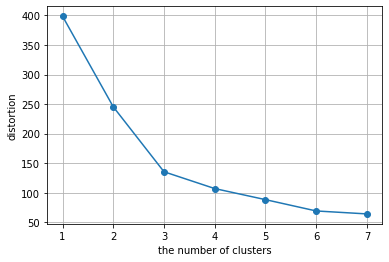

In [82]:
k = 7
arr = np.zeros(k)

for i in range(k):
    arr[i] = New_kmeans(data[:, 2:4], i+1)[-1]

plt.plot(np.arange(1, k+1, 1), arr, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

# using elbow method k = 3

[[4.02626193 1.97532561]
 [1.91649184 1.74218883]
 [2.6158074  3.43898167]]


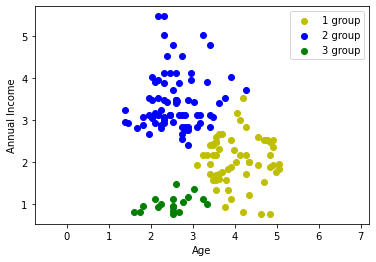

In [83]:
codebook = np.resize(New_kmeans(data[:, 2:4], 3)[:-1], [3, 2])
print(codebook)

x = vec_to_cluster(data[:, 2:4], code_book)
group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='1 group')
plt.scatter(group2[:, 0], group2[:, 1], c='b', label='2 group')
plt.scatter(group3[:, 0], group3[:, 1], c='g', label='3 group')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

Годовой доход молодых (1 group) и пожилых(3 group) людей ниже дохода покупателей средних лет (2 group)

# Возраст - покупательский индекс

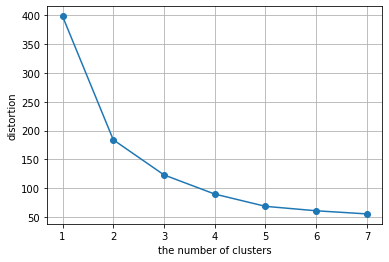

In [84]:
k = 7
arr = np.zeros(k)

for i in range(k):
    arr[i] = New_kmeans(data[:, [2,4]], i+1)[-1]
plt.plot(np.arange(1, k+1, 1), arr, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

# using elbow method k = 4

[[4.06190021 1.59918649]
 [2.21623779 3.21947806]
 [2.8064826  0.74563408]
 [1.88595942 1.99445033]]


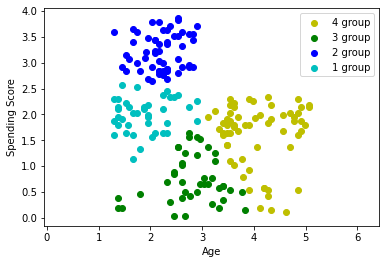

In [85]:
code_book = np.resize(New_kmeans(data[:, [2,4]], 4)[:-1], [4, 2])
print(code_book)

x = vec_to_cluster(data[:, [2,4]], code_book)
group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]
group4 = x[x[:, -1] == 3]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='4 group')
plt.scatter(group3[:, 0], group3[:, 1], c='g', label='3 group')
plt.scatter(group2[:, 0], group2[:, 1], c='b', label='2 group')
plt.scatter(group4[:, 0], group4[:, 1], c='c', label='1 group')


plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Имеем 4 условные группы:  
1)молодые люди, которые живут покупают товары по акциям  
2)молодые люди, которые уже неплохо зарабатывают и спокойно ходят по магазинам  
3)люди среднего возраста, имеющие небольшую зарплату  
4)люди зрелого возраста, с обычной зарплатой

# доход-покупательский индекс

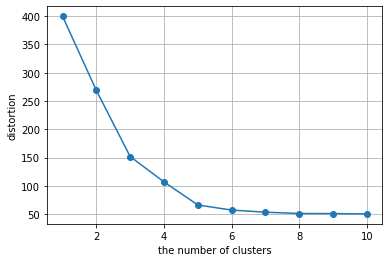

In [86]:
k = 10
arr = np.zeros(k)

for i in range(k):
    arr[i] = New_kmeans(data[:, 3:5], i+1)[-1]
plt.plot(np.arange(1, k+1, 1), arr, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

# using elbow method k=5

[[2.19488183 1.94161095]
 [3.4411634  3.21045358]
 [3.48933915 0.68734653]
 [1.11424605 3.10894835]
 [1.12511652 0.78398919]]


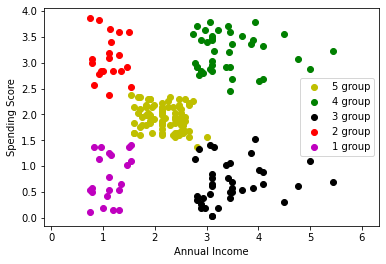

In [87]:
code_book = np.resize(New_kmeans(data[:, 3:5], 5)[:-1], [5, 2])
print(code_book)

x = vec_to_cluster(data[:, 3:5], code_book)
group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]
group4 = x[x[:, -1] == 3]
group5 = x[x[:, -1] == 4]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='5 group')
plt.scatter(group2[:, 0], group2[:, 1], c='g', label='4 group')
plt.scatter(group3[:, 0], group3[:, 1], c='black', label='3 group')
plt.scatter(group4[:, 0], group4[:, 1], c='r', label='2 group')
plt.scatter(group5[:, 0], group5[:, 1], c='m', label='1 group')


plt.axis('equal')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Получили симметричное разбиение на группы  
1) бедные с низким уровнем покупатеьского индекса  
2) бедные, но с выским уровем покупательского индекса  
3) богатые с низким уровнем индекса  
4) богатые с высокми уровнем индекса  
5) что то среднее  